In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
df = pd.read_csv('airlines_reviews.csv')
df.head()

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended
0,Flight was amazing,Alison Soetantyo,2024-03-01,Singapore Airlines,True,Flight was amazing. The crew onboard this fl...,Solo Leisure,December 2023,Jakarta to Singapore,Business Class,4,4,4,4,4,9,yes
1,seats on this aircraft are dreadful,Robert Watson,2024-02-21,Singapore Airlines,True,Booking an emergency exit seat still meant h...,Solo Leisure,February 2024,Phuket to Singapore,Economy Class,5,3,4,4,1,3,no
2,Food was plentiful and tasty,S Han,2024-02-20,Singapore Airlines,True,Excellent performance on all fronts. I would...,Family Leisure,February 2024,Siem Reap to Singapore,Economy Class,1,5,2,1,5,10,yes
3,“how much food was available,D Laynes,2024-02-19,Singapore Airlines,True,Pretty comfortable flight considering I was f...,Solo Leisure,February 2024,Singapore to London Heathrow,Economy Class,5,5,5,5,5,10,yes
4,“service was consistently good”,A Othman,2024-02-19,Singapore Airlines,True,The service was consistently good from start ...,Family Leisure,February 2024,Singapore to Phnom Penh,Economy Class,5,5,5,5,5,10,yes


In [7]:
df.shape

(8100, 17)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8100 entries, 0 to 8099
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   8100 non-null   object
 1   Name                    8100 non-null   object
 2   Review Date             8100 non-null   object
 3   Airline                 8100 non-null   object
 4   Verified                8100 non-null   object
 5   Reviews                 8100 non-null   object
 6   Type of Traveller       8100 non-null   object
 7   Month Flown             8100 non-null   object
 8   Route                   8100 non-null   object
 9   Class                   8100 non-null   object
 10  Seat Comfort            8100 non-null   int64 
 11  Staff Service           8100 non-null   int64 
 12  Food & Beverages        8100 non-null   int64 
 13  Inflight Entertainment  8100 non-null   int64 
 14  Value For Money         8100 non-null   int64 
 15  Over

In [7]:
pd.set_option('display.max_row', None)

In [ ]:
df.sample(6)

In [9]:
# read some statistics 

df.describe()

,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating
count,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000
mean,3.414815,3.569877,3.384074,3.636790,3.148642,5.632469
std,1.397183,1.527436,1.455694,1.309564,1.589377,3.523664
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,3.000000,1.000000,2.000000
50%,4.000000,4.000000,4.000000,4.000000,3.000000,6.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,9.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000


In [10]:
df.describe().astype('int64')

,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating
count,8100,8100,8100,8100,8100,8100
mean,3,3,3,3,3,5
std,1,1,1,1,1,3
min,1,1,1,0,1,1
25%,2,2,2,3,1,2
50%,4,4,4,4,3,6
75%,5,5,5,5,5,9
max,5,5,5,5,5,10


In [7]:
df.dtypes

Title                     object
Name                      object
Review Date               object
Airline                   object
Verified                  object
Reviews                   object
Type of Traveller         object
Month Flown               object
Route                     object
Class                     object
Seat Comfort               int64
Staff Service              int64
Food & Beverages           int64
Inflight Entertainment     int64
Value For Money            int64
Overall Rating             int64
Recommended               object
dtype: object

In [11]:
# droping two columns that I wouldn't using them

df.drop(columns = ['Title'], inplace = True ) 
df.drop(columns=['Reviews'], inplace = True)

In [ ]:
# search everyone has 'S Han' in my data

search_result = df[df['Name'].str.contains('S Han', case=False)]
search_result

In [ ]:
# searching a name called 'Alison Soetantyo'

search_name = df[df['Name'].str.contains ('Alison Soetantyo', case = False)]
search_name

In [27]:
# filtring just the column 'type of traveller' especially 'Solo Leisure' label

filtr = df[df['Type of Traveller'] == 'Solo Leisure']
filtr

In [ ]:
# changing the objet type of 'month Flown' column to date type

df['Month Flown'] = df['Month Flown'].astype('datetime')

df['Month Flown_date'] = pd.to_datetime(df['Month Flown'])
print(df.dtypes)

In [11]:
df['Airline'].value_counts()

Airline
Turkish Airlines          1685
Qatar Airways             1624
Emirates                  1350
Singapore Airlines         972
Air France                 798
Cathay Pacific Airways     744
EVA Air                    281
All Nippon Airways         258
Japan Airlines             201
Korean Air                 187
Name: count, dtype: int64

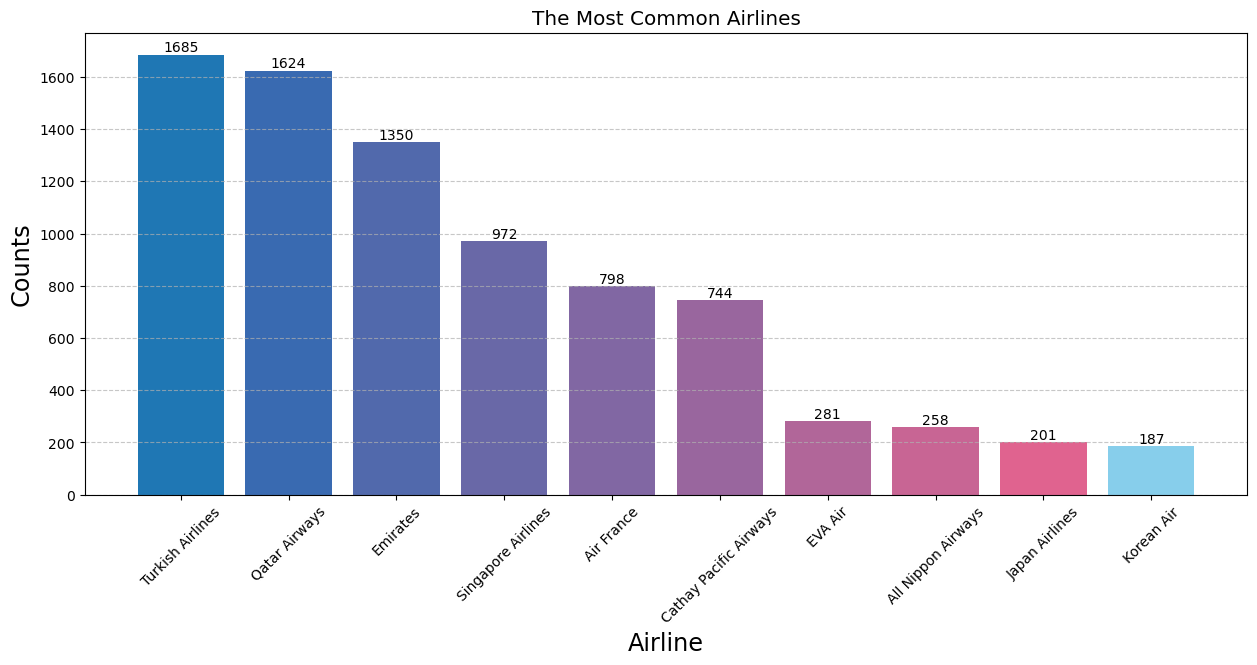

In [8]:
# Importing the necessary library
import matplotlib.pyplot as plt

# Calculate the counts of each airline
airline_count = df['Airline'].value_counts()

# Extracting the index and values 
itemName = airline_count.index
ValueName = airline_count.values

# Define colors for each bar
colors = ['#1f77b4', '#396ab1', '#5169ac', '#6968a7', '#8167a3', '#99669e', '#b16699', '#c86594', '#e0638f', '#87ceeb']

# Create a figure and set its size
plt.figure(figsize=(15, 6))

# Create a bar plot
plt.bar(itemName, ValueName, color=colors)

# Set labels for x and y axes and the title of the plot
plt.xlabel('Airline', fontsize='xx-large')
plt.ylabel('Counts', fontsize='xx-large')
plt.title('The Most Common Airlines', fontsize='x-large')

# Add value labels to each bar
for i in range(len(itemName)):
    plt.text(i, ValueName[i], ValueName[i], ha='center', va='bottom')

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Save the plot as an image
plt.savefig('The most airline')

# Display the plot
plt.show()

In [13]:
df['Type of Traveller'].value_counts().to_frame()

,count
Type of Traveller,
Solo Leisure,3237
Couple Leisure,1899
Family Leisure,1551
Business,1413


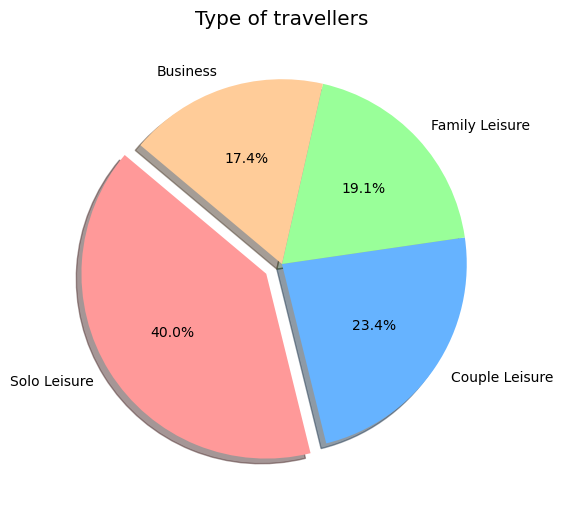

In [9]:
import matplotlib.pyplot as plt

# Calculate the counts of each type of traveller
Type_of_Traveller_count = df['Type of Traveller'].value_counts()

# Extracting the index and values 
itemValue = Type_of_Traveller_count.values
itemName = Type_of_Traveller_count.index

# Define colors for each segment of the pie chart
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Define explode (to separate slices)
explode = (0.1, 0, 0, 0)

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(itemValue, labels=itemName, colors=colors, explode=explode, shadow=True, autopct='%1.1f%%', startangle=140)

# Set title of the plot
plt.title('Type of travellers', fontsize='x-large')

# Display the plot
plt.show()

In [28]:
df['Class'].value_counts()

Class
Economy Class      5504
Business Class     2104
Premium Economy     371
First Class         121
Name: count, dtype: int64

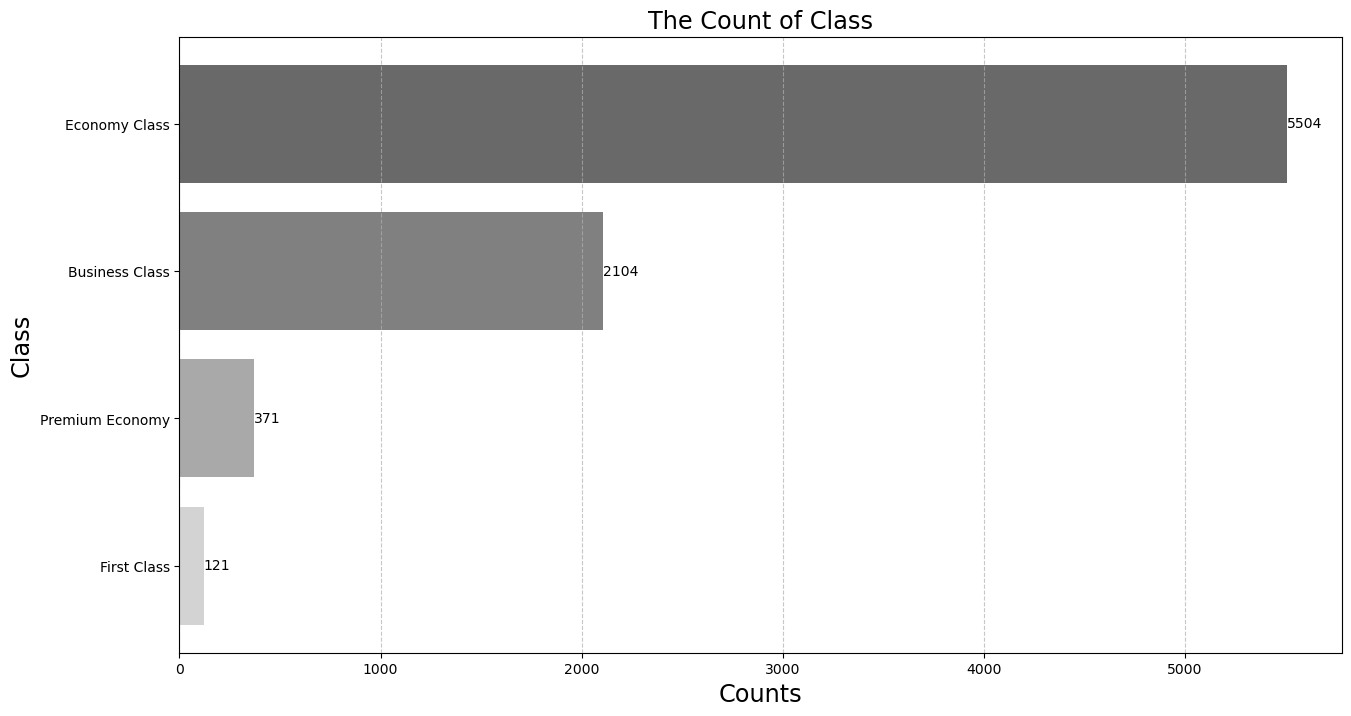

In [10]:
import matplotlib.pyplot as plt

# Calculate the counts of each class
class_count = df['Class'].value_counts()

# Extracting the index and values 
itemValue = class_count.values
itemName = class_count.index

# Define colors for each bar
colors = ['LightGray','DarkGray','Gray', 'DimGray']

# Reverse the order of the data
itemValue = itemValue[::-1]
itemName = itemName[::-1]

# Create a figure and set its size
plt.figure(figsize=(15, 8))

# Create a horizontal bar plot
plt.barh(itemName, itemValue, color=colors)

    
# Add text annotations for each bar
for i in range(len(itemName)):
    plt.text(itemValue[i] + 0.5 , i, itemValue[i], ha='left', va='center')

# Set labels for x and y axes and the title of the plot
plt.title('The Count of Class', fontsize='xx-large')
plt.xlabel('Counts', fontsize='xx-large')
plt.ylabel('Class', fontsize='xx-large')

# Add grid lines
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()



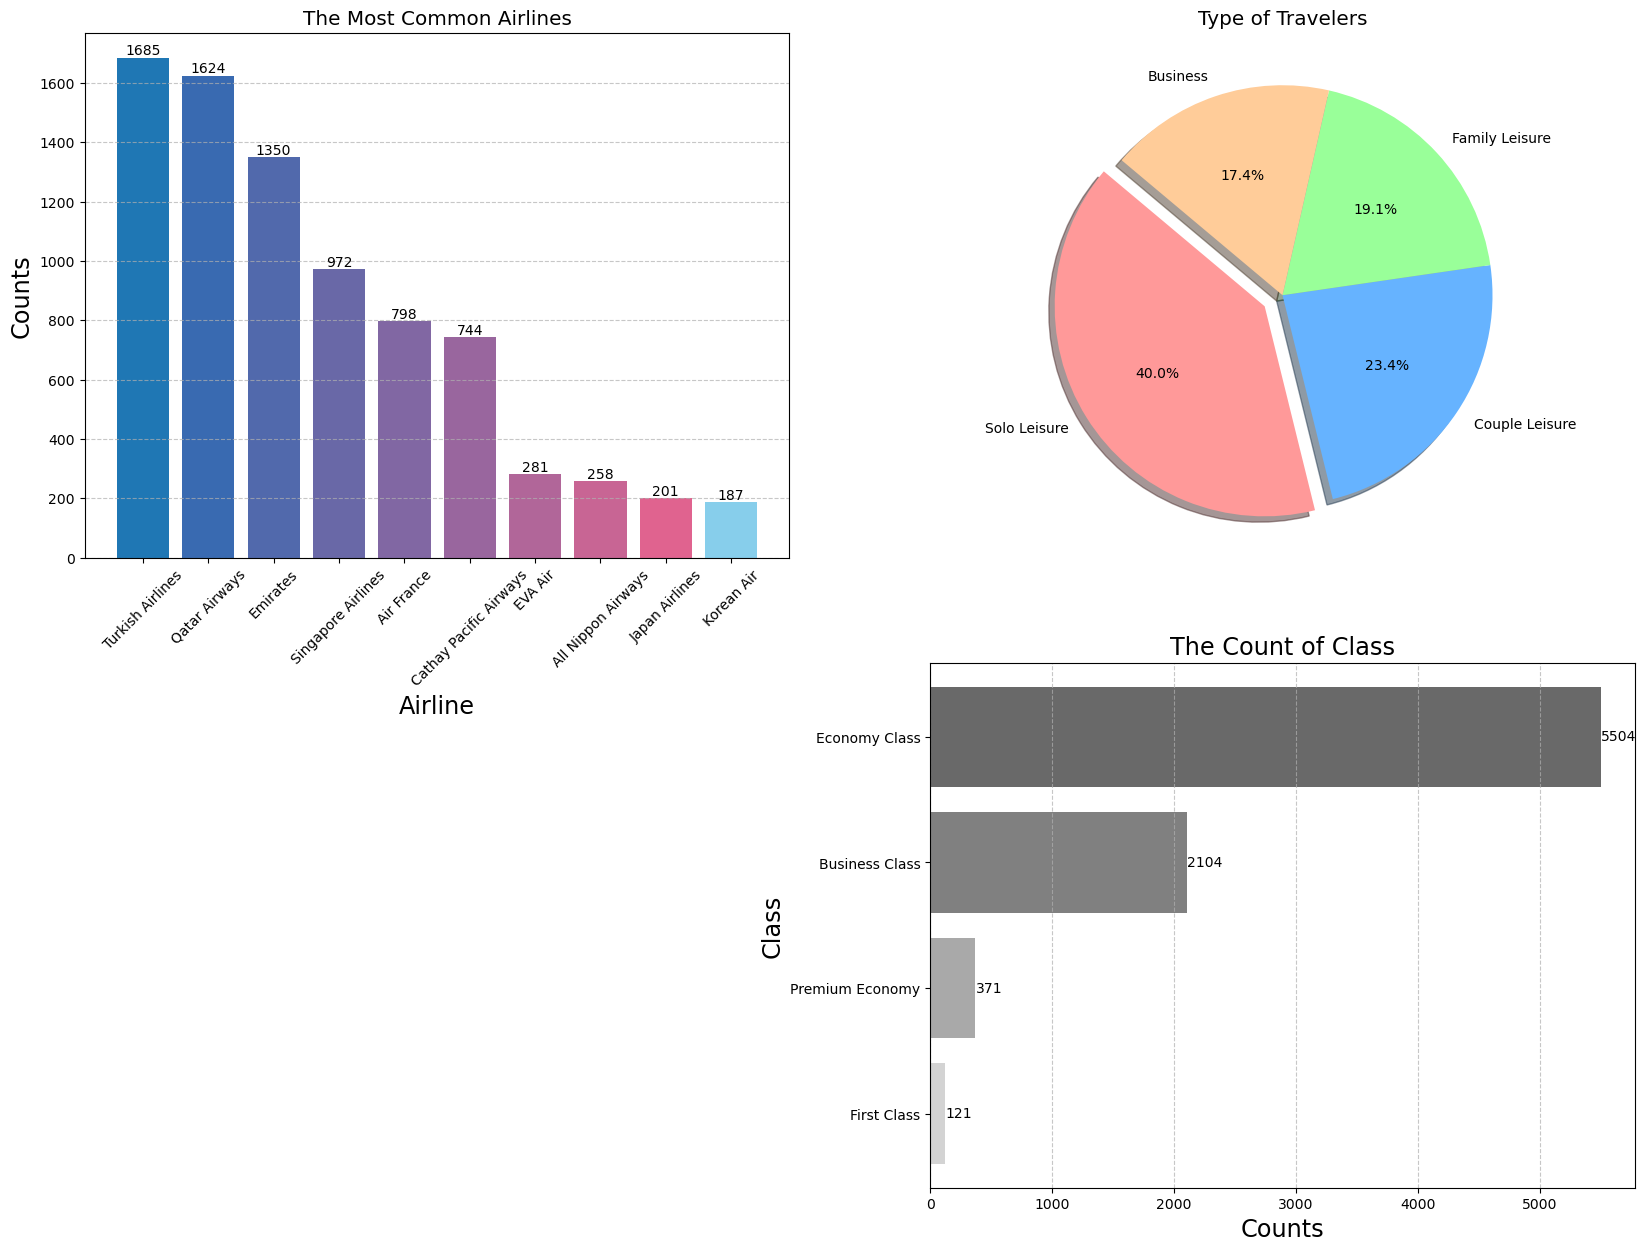

In [15]:
import matplotlib.pyplot as plt

# Importing the necessary library
import matplotlib.pyplot as plt

# Calculate the counts of each airline
airline_count = df['Airline'].value_counts()

# Extracting the index and values 
itemName_airline = airline_count.index
ValueName_airline = airline_count.values

# Define colors for each bar
colors_airline = ['#1f77b4', '#396ab1', '#5169ac', '#6968a7', '#8167a3', '#99669e', '#b16699', '#c86594', '#e0638f', '#87ceeb']

# Create a figure and set its size
plt.figure(figsize=(20, 15))

# Create the first bar plot for airline counts
plt.subplot(2, 2, 1)
plt.bar(itemName_airline, ValueName_airline, color=colors_airline)
for i in range(len(itemName_airline)):
    plt.text(i, ValueName_airline[i], ValueName_airline[i], ha='center', va='bottom')
plt.xlabel('Airline', fontsize='xx-large')
plt.ylabel('Counts', fontsize='xx-large')
plt.title('The Most Common Airlines', fontsize='x-large')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Calculate the counts of each type of traveller
Type_of_Traveller_count = df['Type of Traveller'].value_counts()

# Extracting the index and values 
itemValue_traveler = Type_of_Traveller_count.values
itemName_traveler = Type_of_Traveller_count.index

# Define colors for each segment of the pie chart
colors_traveler = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Define explode (to separate slices)
explode_traveler = (0.1, 0, 0, 0)

# Create the second pie chart for type of travelers
plt.subplot(2, 2, 2)
plt.pie(itemValue_traveler, labels=itemName_traveler, colors=colors_traveler, explode=explode_traveler, shadow=True, autopct='%1.1f%%', startangle=140)
plt.title('Type of Travelers', fontsize='x-large')

# Calculate the counts of each class
class_count = df['Class'].value_counts()

# Extracting the index and values 
itemValue_class = class_count.values
itemName_class = class_count.index

# Define colors for each bar
colors_class = ['LightGray','DarkGray','Gray', 'DimGray']

# Reverse the order of the data
itemValue_class = itemValue_class[::-1]
itemName_class = itemName_class[::-1]

# Create the third horizontal bar plot for class counts
plt.subplot(2, 2, 4)
plt.barh(itemName_class, itemValue_class, color=colors_class)
for i in range(len(itemName_class)):
    plt.text(itemValue_class[i] + 0.5 , i, itemValue_class[i], ha='left', va='center')
plt.title('The Count of Class', fontsize='xx-large')
plt.xlabel('Counts', fontsize='xx-large')
plt.ylabel('Class', fontsize='xx-large')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Save the plot as an image
plt.savefig('Visualization_Overview.png')

# Display the plot
plt.show()

In [12]:
df["Overall Rating"].groupby(df['Airline']).mean()

Airline
Air France                4.637845
All Nippon Airways        7.949612
Cathay Pacific Airways    6.169355
EVA Air                   7.419929
Emirates                  4.674074
Japan Airlines            7.099502
Korean Air                6.491979
Qatar Airways             7.195813
Singapore Airlines        6.542181
Turkish Airlines          3.679525
Name: Overall Rating, dtype: float64

In [13]:
df["Overall Rating"].groupby(df['Type of Traveller']).mean()


Type of Traveller
Business          5.376504
Couple Leisure    5.476040
Family Leisure    5.135397
Solo Leisure      6.074143
Name: Overall Rating, dtype: float64

In [14]:
df["Overall Rating"].groupby(df['Class']).mean()


Class
Business Class     6.650665
Economy Class      5.177326
First Class        7.603306
Premium Economy    5.967655
Name: Overall Rating, dtype: float64

In [15]:
df['Verified'].unique()


array(['True', 'False', '*Unverified*', 'NotVerified',
       'we do appreciate you bringing this matter to our attention. Please accept my apologies for not having met your expectations; I do hope that we can leave you and your family with a more positive impression on your future flights with us'],
      dtype=object)

In [17]:
df['Type of Traveller'].unique()


array(['Solo Leisure', 'Family Leisure', 'Business', 'Couple Leisure'],
      dtype=object)

In [18]:
df['Class'].unique()


array(['Business Class', 'Economy Class', 'Premium Economy',
       'First Class'], dtype=object)

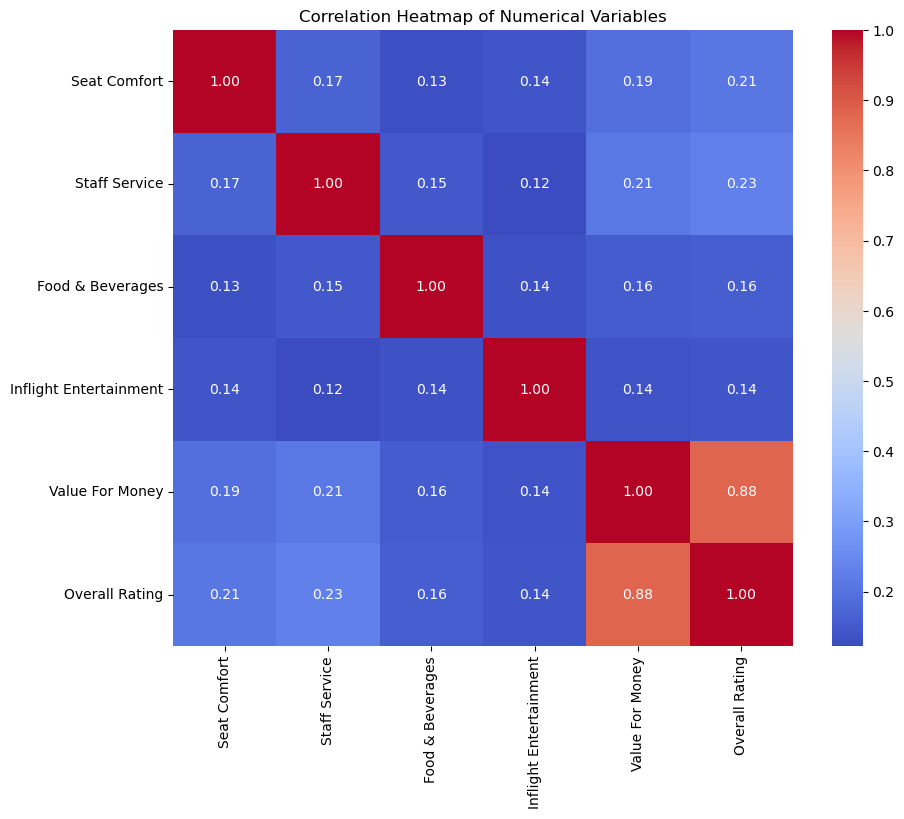

In [20]:
# Selecting numerical columns for correlation calculation

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_columns].corr()

# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

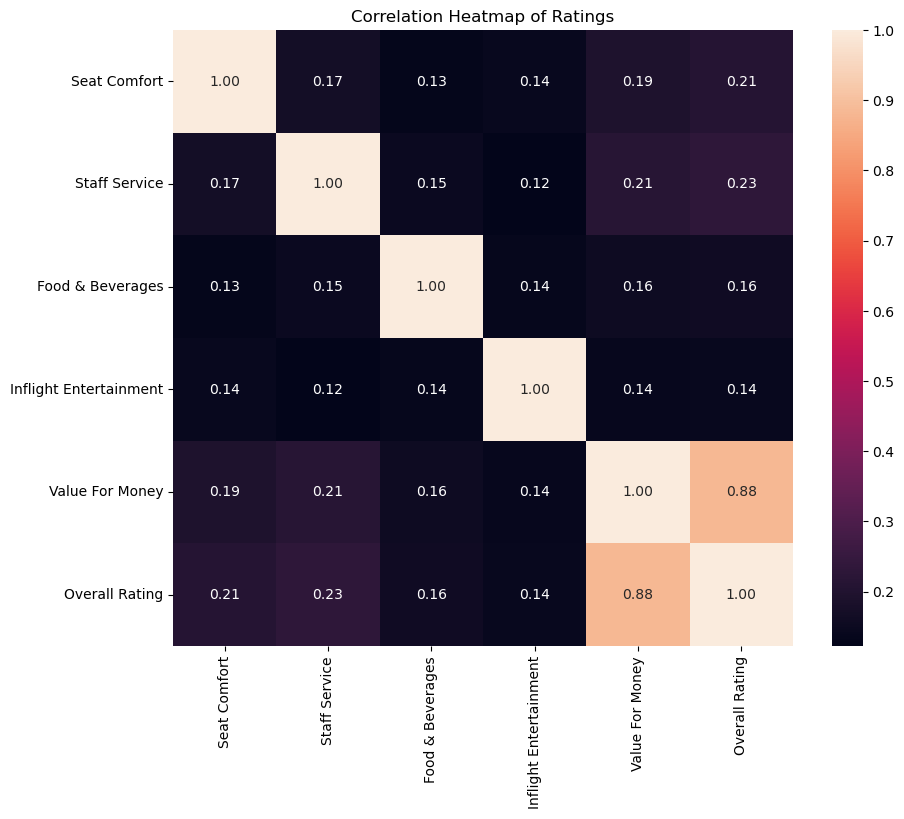

In [21]:
# Selecting relevant rating columns
rating_columns = ['Seat Comfort', 'Staff Service', 'Food & Beverages', 
                  'Inflight Entertainment', 'Value For Money', 'Overall Rating']


# Calculating correlation matrix for rating columns
rating_correlation = df[rating_columns].corr()


# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(rating_correlation, annot=True
            , fmt=".2f")
plt.title('Correlation Heatmap of Ratings')
plt.show()

In [22]:
df['Airline'].value_counts().reset_index()


,Airline,count
0,Turkish Airlines,1685
1,Qatar Airways,1624
2,Emirates,1350
3,Singapore Airlines,972
4,Air France,798
5,Cathay Pacific Airways,744
6,EVA Air,281
7,All Nippon Airways,258
8,Japan Airlines,201
9,Korean Air,187


In [27]:
df['Airline'].value_counts()

Airline
Turkish Airlines          1685
Qatar Airways             1624
Emirates                  1350
Singapore Airlines         972
Air France                 798
Cathay Pacific Airways     744
EVA Air                    281
All Nippon Airways         258
Japan Airlines             201
Korean Air                 187
Name: count, dtype: int64

In [24]:
df['Review Date'] = pd.to_datetime(df['Review Date'])
df['year']= df['Review Date'].dt.year

In [25]:
df

,Name,Review Date,Airline,Verified,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended,year
0,Alison Soetantyo,2024-03-01,Singapore Airlines,True,Solo Leisure,December 2023,Jakarta to Singapore,Business Class,4,4,4,4,4,9,yes,2024
1,Robert Watson,2024-02-21,Singapore Airlines,True,Solo Leisure,February 2024,Phuket to Singapore,Economy Class,5,3,4,4,1,3,no,2024
2,S Han,2024-02-20,Singapore Airlines,True,Family Leisure,February 2024,Siem Reap to Singapore,Economy Class,1,5,2,1,5,10,yes,2024
3,D Laynes,2024-02-19,Singapore Airlines,True,Solo Leisure,February 2024,Singapore to London Heathrow,Economy Class,5,5,5,5,5,10,yes,2024
4,A Othman,2024-02-19,Singapore Airlines,True,Family Leisure,February 2024,Singapore to Phnom Penh,Economy Class,5,5,5,5,5,10,yes,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8095,N Vickers,2016-06-20,Korean Air,True,Business,June 2016,BNE to ULN via ICN,Economy Class,5,4,5,3,4,7,yes,2016
8096,Kim Holloway,2016-06-12,Korean Air,False,Couple Leisure,June 2016,SYD to LHR via ICN,Economy Class,3,5,5,4,5,10,yes,2016
8097,C Clark,2016-06-06,Korean Air,True,Business,April 2016,DPS to ICN,Business Class,4,5,5,5,1,2,no,2016
8098,E Petan,2016-04-21,Korean Air,False,Business,April 2016,ICN to CDG,Business Class,5,1,3,4,5,10,yes,2016
